<a href="https://colab.research.google.com/github/lalitha-sahitya/Predicting-Charges/blob/main/costprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
import os

In [68]:
!pip install opendatasets

In [69]:
import opendatasets as od

In [70]:
od.download('https://www.kaggle.com/competitions/cost-prediction-for-logistic-company-ml')

Skipping, found downloaded files in "./cost-prediction-for-logistic-company-ml" (use force=True to force download)


In [71]:
os.listdir('cost-prediction-for-logistic-company-ml')

['train.csv', 'test.csv']

In [72]:
import pandas as pd

In [73]:
data=pd.read_csv('/content/cost-prediction-for-logistic-company-ml/train.csv')
data.head()

,trip,date,dayPart,exWeatherTag,originLocation,destinationLocation,distance,type,weight,packageType,carrier,cost
0,t52712528,2017-09-06,night,NaN,S4,D7,2200,expedited,50,NaN,D,68.413152
1,t29859381,2017-10-21,night,NaN,S8,D1,1800,NaN,12,NaN,B,36.450649
2,t25702332,2017-07-15,night,NaN,S9,D5,2800,NaN,1,NaN,B,9.057939
3,t27713405,2017-10-22,day,NaN,S9,D7,3200,NaN,50,NaN,C,57.320087
4,t49439220,2019-12-11,day,snow,S9,D1,2000,NaN,43,NaN,B,77.263777


In [74]:
test_data=pd.read_csv('/content/cost-prediction-for-logistic-company-ml/test.csv')
test_data.head()

,trip,date,dayPart,exWeatherTag,originLocation,destinationLocation,distance,type,weight,packageType,carrier
0,t333282728025,2017-09-27,night,NaN,S2,D8,2000,NaN,50,NaN,C
1,t35583500660,2017-12-12,day,snow,S2,D1,600,NaN,22,NaN,A
2,t117664376784,2018-11-18,day,NaN,S7,D1,1600,expedited,30,NaN,D
3,t261320757828,2019-11-18,day,NaN,S5,D6,2200,NaN,32,NaN,B
4,t147086054909,2019-06-02,night,heat,S6,D7,2600,NaN,7,NaN,B


In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38999 entries, 0 to 38998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   trip                 38999 non-null  object 
 1   date                 38999 non-null  object 
 2   dayPart              38999 non-null  object 
 3   exWeatherTag         4882 non-null   object 
 4   originLocation       38999 non-null  object 
 5   destinationLocation  38999 non-null  object 
 6   distance             38999 non-null  int64  
 7   type                 3748 non-null   object 
 8   weight               38999 non-null  int64  
 9   packageType          2500 non-null   object 
 10  carrier              38999 non-null  object 
 11  cost                 38999 non-null  float64
dtypes: float64(1), int64(2), object(9)
memory usage: 3.6+ MB


In [76]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 802 entries, 0 to 801
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   trip                 802 non-null    object
 1   date                 802 non-null    object
 2   dayPart              802 non-null    object
 3   exWeatherTag         101 non-null    object
 4   originLocation       802 non-null    object
 5   destinationLocation  802 non-null    object
 6   distance             802 non-null    int64 
 7   type                 73 non-null     object
 8   weight               802 non-null    int64 
 9   packageType          52 non-null     object
 10  carrier              802 non-null    object
dtypes: int64(2), object(9)
memory usage: 69.1+ KB


In [77]:
data=data.drop(['exWeatherTag','type','packageType'],axis=1)
test_data=test_data.drop(['exWeatherTag','type','packageType'],axis=1)

In [78]:
data.head()

,trip,date,dayPart,originLocation,destinationLocation,distance,weight,carrier,cost
0,t52712528,2017-09-06,night,S4,D7,2200,50,D,68.413152
1,t29859381,2017-10-21,night,S8,D1,1800,12,B,36.450649
2,t25702332,2017-07-15,night,S9,D5,2800,1,B,9.057939
3,t27713405,2017-10-22,day,S9,D7,3200,50,C,57.320087
4,t49439220,2019-12-11,day,S9,D1,2000,43,B,77.263777


In [79]:
data.trip.nunique()

38999

In [80]:
data=data.drop('trip',axis=1)
test_data=test_data.drop('trip',axis=1)

In [81]:
data.originLocation.nunique()

9

In [82]:
data.destinationLocation.nunique()

9

In [83]:
data.carrier.nunique()

4

In [84]:
data['year']=pd.DatetimeIndex(data['date']).year
test_data['year']=pd.DatetimeIndex(test_data['date']).year

In [85]:
data['month']=pd.DatetimeIndex(data['date']).month
test_data['month']=pd.DatetimeIndex(test_data['date']).month

In [86]:
data['day']=pd.DatetimeIndex(data['date']).day
test_data['day']=pd.DatetimeIndex(test_data['date']).day

In [87]:
data=data.drop('date',axis=1)
test_data=test_data.drop('date',axis=1)

In [88]:
data.head()

,dayPart,originLocation,destinationLocation,distance,weight,carrier,cost,year,month,day
0,night,S4,D7,2200,50,D,68.413152,2017,9,6
1,night,S8,D1,1800,12,B,36.450649,2017,10,21
2,night,S9,D5,2800,1,B,9.057939,2017,7,15
3,day,S9,D7,3200,50,C,57.320087,2017,10,22
4,day,S9,D1,2000,43,B,77.263777,2019,12,11


In [89]:
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

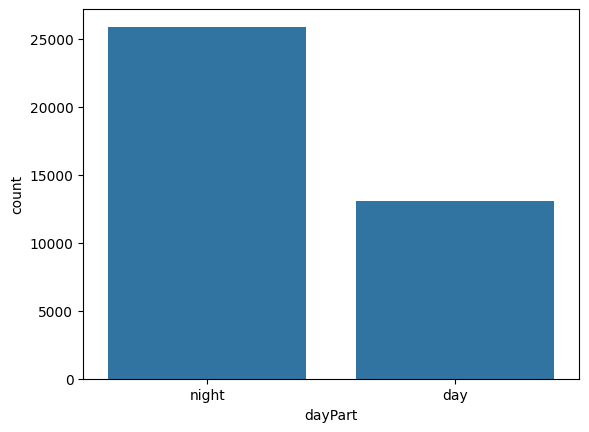

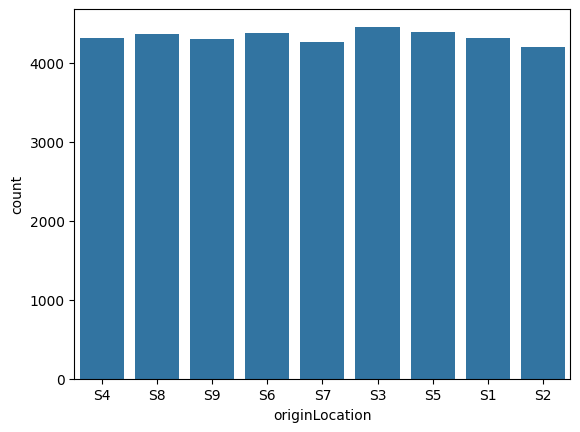

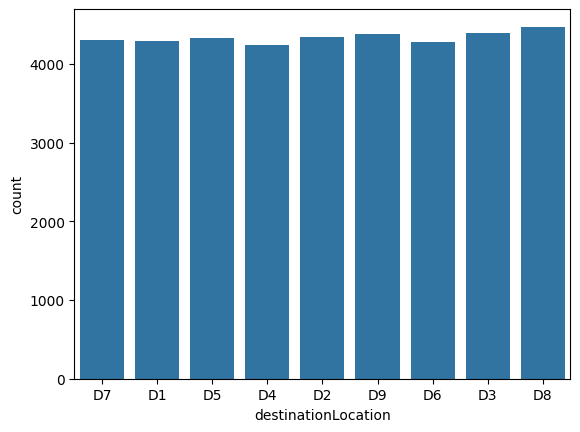

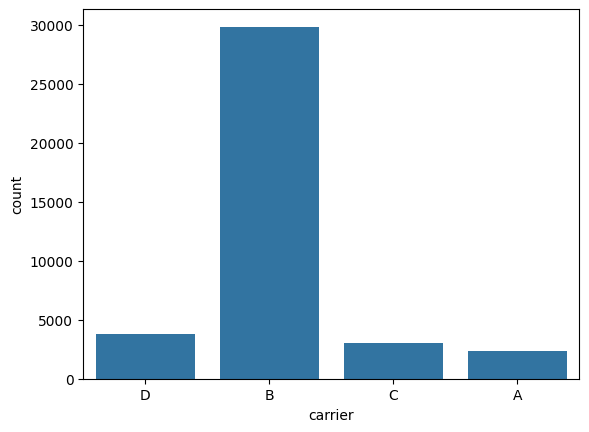

In [90]:
for i in data.select_dtypes(include='object'):
  sns.countplot(data=data,x=i)
  plt.show()

<ipython-input-91-09c274b01581>:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




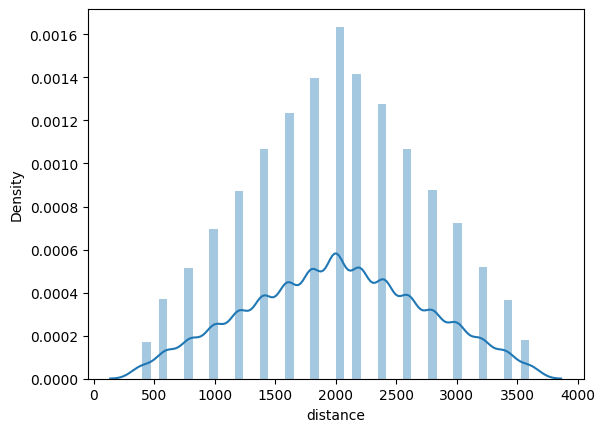

<ipython-input-91-09c274b01581>:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




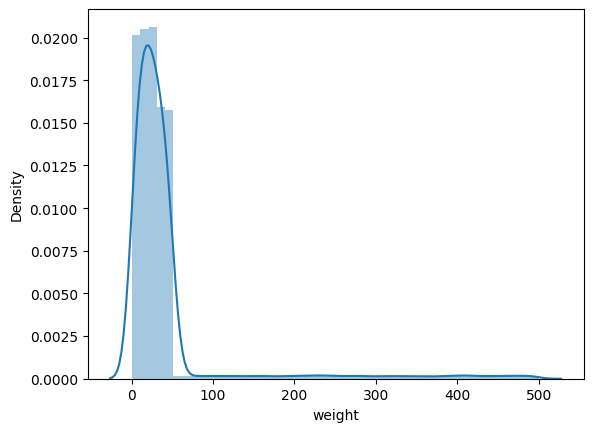

<ipython-input-91-09c274b01581>:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




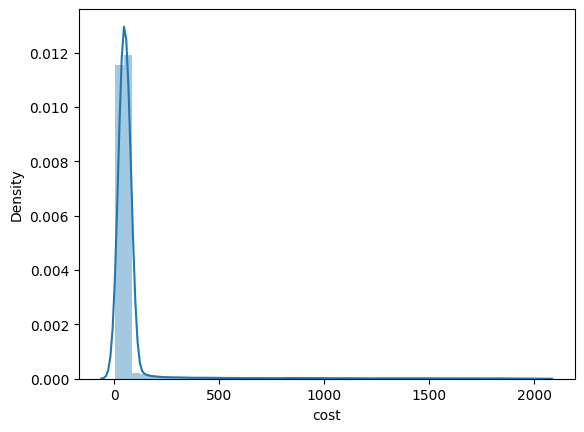

<ipython-input-91-09c274b01581>:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




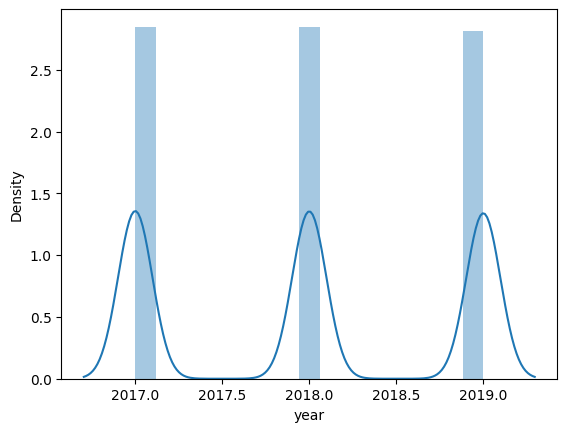

<ipython-input-91-09c274b01581>:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




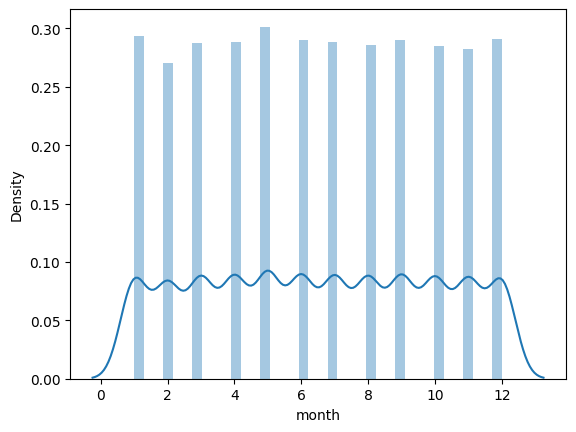

<ipython-input-91-09c274b01581>:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




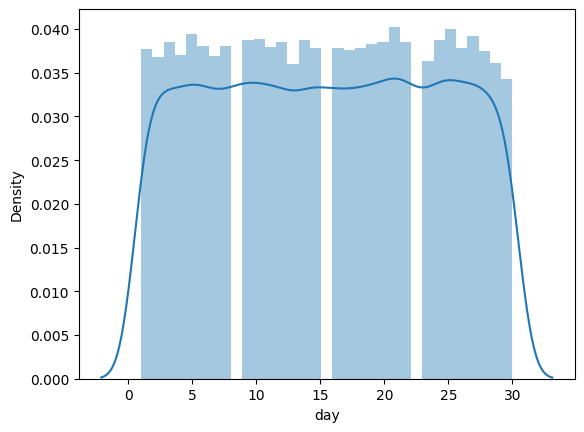

In [91]:
for i in data.select_dtypes(include='number').columns:
  sns.distplot(data[i])
  plt.show()

In [92]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
for i in data.select_dtypes(include='object').columns:
  data[i]=enc.fit_transform(data[i])
  test_data[i]=enc.transform(test_data[i])

In [93]:
data.head()

,dayPart,originLocation,destinationLocation,distance,weight,carrier,cost,year,month,day
0,1,3,6,2200,50,3,68.413152,2017,9,6
1,1,7,0,1800,12,1,36.450649,2017,10,21
2,1,8,4,2800,1,1,9.057939,2017,7,15
3,0,8,6,3200,50,2,57.320087,2017,10,22
4,0,8,0,2000,43,1,77.263777,2019,12,11


In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38999 entries, 0 to 38998
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   dayPart              38999 non-null  float64
 1   originLocation       38999 non-null  float64
 2   destinationLocation  38999 non-null  float64
 3   distance             38999 non-null  float64
 4   weight               38999 non-null  float64
 5   carrier              38999 non-null  float64
 6   cost                 38999 non-null  float64
 7   year                 38999 non-null  int32  
 8   month                38999 non-null  int32  
 9   day                  38999 non-null  int32  
dtypes: float64(7), int32(3)
memory usage: 2.5 MB


In [97]:
data.shape

(38999, 10)

In [98]:
x=data.drop(['cost'],axis=1)
y=data[['cost']]

In [99]:
x.head()

,dayPart,originLocation,destinationLocation,distance,weight,carrier,year,month,day
0,1.0,0.375,0.75,0.5625,0.098196,1.000000,0.0,0.727273,0.172414
1,1.0,0.875,0.00,0.4375,0.022044,0.333333,0.0,0.818182,0.689655
2,1.0,1.000,0.50,0.7500,0.000000,0.333333,0.0,0.545455,0.482759
3,0.0,1.000,0.75,0.8750,0.098196,0.666667,0.0,0.818182,0.724138
4,0.0,1.000,0.00,0.5000,0.084168,0.333333,1.0,1.000000,0.344828


In [100]:
y.head()

,cost
0,0.031475
1,0.015610
2,0.002014
3,0.025969
4,0.035868


In [101]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [102]:
x_train.shape

(31199, 9)

In [103]:
x_test.shape

(7800, 9)

In [104]:
y_train.shape

(31199, 1)

In [105]:
y_test.shape

(7800, 1)

In [107]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_train=pd.DataFrame(scaler.fit_transform(x_train),columns=x_train.columns)
x_test=pd.DataFrame(scaler.transform(x_test),columns=x_test.columns)
test_data=pd.DataFrame(scaler.transform(test_data),columns=test_data.columns)

In [108]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [124]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
model.fit(x_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RandomForestRegressor()

In [125]:
preds=model.predict(x_test)

In [126]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,preds)

6.03544516646533e-07

In [127]:
p=model.predict(test_data)

In [128]:
test=pd.read_csv('/content/cost-prediction-for-logistic-company-ml/test.csv')

In [129]:
test.head()

,trip,date,dayPart,exWeatherTag,originLocation,destinationLocation,distance,type,weight,packageType,carrier
0,t333282728025,2017-09-27,night,NaN,S2,D8,2000,NaN,50,NaN,C
1,t35583500660,2017-12-12,day,snow,S2,D1,600,NaN,22,NaN,A
2,t117664376784,2018-11-18,day,NaN,S7,D1,1600,expedited,30,NaN,D
3,t261320757828,2019-11-18,day,NaN,S5,D6,2200,NaN,32,NaN,B
4,t147086054909,2019-06-02,night,heat,S6,D7,2600,NaN,7,NaN,B


In [130]:
test=test[['trip','weight']]

In [131]:
test.head()

,trip,weight
0,t333282728025,50
1,t35583500660,22
2,t117664376784,30
3,t261320757828,32
4,t147086054909,7


In [132]:
test['weight']=p

In [133]:
test.head()

,trip,weight
0,t333282728025,0.028814
1,t35583500660,0.013464
2,t117664376784,0.030277
3,t261320757828,0.033692
4,t147086054909,0.014844


In [134]:
test['cost']=test['weight']

In [135]:
test.head()

,trip,weight,cost
0,t333282728025,0.028814,0.028814
1,t35583500660,0.013464,0.013464
2,t117664376784,0.030277,0.030277
3,t261320757828,0.033692,0.033692
4,t147086054909,0.014844,0.014844


In [136]:
test.drop(['weight'],axis=1,inplace=True)

In [137]:
test.head()

,trip,cost
0,t333282728025,0.028814
1,t35583500660,0.013464
2,t117664376784,0.030277
3,t261320757828,0.033692
4,t147086054909,0.014844


In [138]:
test.to_csv('submission.csv',index=False)